In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.express as px


mpl.rc('font', family= 'Malgun Gothic')


In [2]:
df1_detect = pd.read_csv('09_Detection.csv')
df1_process = pd.read_csv('09_Process_A.csv')

In [3]:
df1_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  474 non-null    int64  
 1   date_clean  474 non-null    object 
 2   tag         474 non-null    object 
 3   tag_num     474 non-null    object 
 4   unit        474 non-null    object 
 5   Y1A         474 non-null    float64
 6   Y2A         474 non-null    float64
 7   Y3A         474 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 29.8+ KB


In [4]:
df1_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  10656 non-null  int64  
 1   Unnamed: 0    10656 non-null  int64  
 2   DATE          10656 non-null  object 
 3   PERIOD        10656 non-null  object 
 4   Label         10656 non-null  object 
 5   A1            10656 non-null  float64
 6   A2            10656 non-null  float64
 7   A3            10656 non-null  float64
 8   A4            10656 non-null  float64
 9   A5            10656 non-null  float64
 10  A6            10656 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 915.9+ KB


In [5]:
# 10mit 단위로 재료의 데이터 측정

df1_process.head(3)

,Unnamed: 0.1,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272
2,2,2,2018-12-01T00:30:00,P1,AVG,225.637431,228.040479,230.276102,230.359142,231.650512,230.317974


In [6]:
# 14h 단위로 재료의 품질 데이터 측정

df1_detect.head(3)

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416
2,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511


In [7]:
# 날짜(시간)기준으로 데이터를 붙여서 

In [8]:
df1_process['datetime']=pd.to_datetime(df1_process['DATE'])
df1_detect['datetime']=pd.to_datetime(df1_detect['date_clean'])

In [9]:
# 품질검사 데이터 (4시간 단위)를 기준으로 병합
# 마이크로초 단위까지 나오는 문제 발생으로 4시간 단위로 데이터가 제대로 붙지 않고 손실이 생김

# 때문에) 시간 단위를 맞춰 줌 -> 품질 검사 데이터(df1_detect) 내에 micro초 단위를 반올림해 없애줌

pd.merge(df1_process, df1_detect, on='datetime', how='inner')

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,20,20,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,229.420348,2018-12-01 03:30:00,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,956,956,2018-12-07T15:30:00,P1,AVG,227.751893,228.723087,229.902814,228.443784,228.029362,225.876851,2018-12-07 15:30:00,39,2018-12-07 15:30:00.000,NE280PV,1701,Total [1/m²],8267.433,619.995,409.988
2,1196,1196,2018-12-18T07:30:00,P2,AVG,228.722661,230.766230,231.967395,231.500405,231.207897,229.468540,2018-12-18 07:30:00,49,2018-12-18 07:30:00.000,NE280PV,1701,Total [1/m²],13048.733,138.455,68.792
3,1364,1364,2018-12-19T11:30:00,P2,AVG,230.624575,232.421385,233.634697,233.103240,232.760809,230.813041,2018-12-19 11:30:00,56,2018-12-19 11:30:00.000,NE280PV,1701,Total [1/m²],15506.726,274.298,122.543
4,1628,1628,2018-12-21T07:30:00,P2,AVG,229.297436,231.142277,232.586504,231.924987,231.753184,230.049808,2018-12-21 07:30:00,67,2018-12-21 07:30:00.000,NE280PV,1701,Total [1/m²],14480.274,360.169,211.553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,10592,10592,2019-09-03T13:30:00,P3,AVG,229.108532,230.471937,230.888572,230.686614,229.439228,227.529035,2019-09-03 13:30:00,468,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561
170,10604,10604,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,227.902789,2019-09-03 15:30:00,469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202
171,10622,10622,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,227.779707,2019-09-03 18:30:00,470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541
172,10628,10628,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,227.779644,2019-09-03 19:30:00,471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793


In [10]:
# 시간 데이터 반올림_round() 이용
# 조건으로 'T'를 줌으로써 분단위 반올림

df1_detect['dt_round'] = df1_detect['datetime'].round('T')

In [11]:
pd.merge(df1_process, df1_detect, left_on='datetime',
         right_on='dt_round',how='inner')

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,...,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round
0,20,20,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,...,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00
1,44,44,2018-12-01T07:30:00,P1,AVG,225.430882,228.297069,230.934893,231.026156,231.795967,...,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00
2,68,68,2018-12-01T11:30:00,P1,AVG,229.063690,230.710820,232.028457,231.395510,231.208500,...,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00
3,92,92,2018-12-01T15:30:00,P1,AVG,228.312661,229.785002,230.958881,230.267388,230.243133,...,3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00
4,116,116,2018-12-01T19:30:00,P1,AVG,229.209428,230.345179,230.993988,230.115520,229.526814,...,4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10592,10592,2019-09-03T13:30:00,P3,AVG,229.108532,230.471937,230.888572,230.686614,229.439228,...,468,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561,2019-09-03 13:30:00.000,2019-09-03 13:30:00
444,10604,10604,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,...,469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00
445,10622,10622,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,...,470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00
446,10628,10628,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,...,471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00


### - **Pandas 시간단위**
- s: 초단위/ T: 분단위 / H: 시간 / D: 일/ B: 평일 기준
- W: 주단위(일)/ W-MON: 주단위(월)
- M : 월단위 (마지막일) / MS: 각 달의 철날
- Q-JAN : 각 분기의 첫달의 마지막 / Q-DEC : 각 분기의 마지막 달의 마지막날

 위 시간 병합 code는 병합 사이의 평균 값으로 merge가 되는 것이 아닌 품질검사 현 시점에서의  병합이기 때문에 30분 사이 공정의 대표값이라고 할 수 없음,

### **따라서**
### 공정 데이터를 30분 단위로 묶어서 통계량을 계산한 다음 30분 단위로 계산된 공정값의 평균값과 품질 검사 데이터르 병합


In [12]:
df1_process_30T = df1_process.set_index('datetime').resample('30T').mean()
df1_process_T = df1_process_30T.reset_index()

# reset_index(): 특정 항목을 Index로 지정/resample: 특정 단위 별로 값을 계산

In [13]:
df1 = pd.merge(df1_process_T, df1_detect,
              left_on ='datetime', right_on = 'dt_round',how='inner')
df1

,datetime_x,Unnamed: 0.1,Unnamed: 0_x,A1,A2,A3,A4,A5,A6,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round
0,2018-12-01 03:30:00,21.0,21.0,224.699436,227.481265,229.793475,229.740466,230.942930,229.493260,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00
1,2018-12-01 07:30:00,45.0,45.0,225.961776,228.662768,231.032141,230.985556,231.878389,230.443650,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00
2,2018-12-01 11:30:00,69.0,69.0,228.338453,230.019735,231.369379,230.724894,230.712800,229.034481,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00
3,2018-12-01 15:30:00,93.0,93.0,228.439517,229.836001,230.997518,230.312817,230.200329,228.407141,3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00
4,2018-12-01 19:30:00,117.0,117.0,229.207077,230.303531,230.998015,230.143217,229.513746,227.562275,4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2019-09-03 13:30:00,10593.0,10593.0,229.164329,230.512538,230.989630,230.667716,229.536600,227.624842,468,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561,2019-09-03 13:30:00.000,2019-09-03 13:30:00
469,2019-09-03 15:30:00,10605.0,10605.0,229.041343,230.561685,231.005577,230.826786,229.778894,227.888726,469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00
470,2019-09-03 18:30:00,10623.0,10623.0,229.045385,230.481412,230.959132,230.813666,229.712553,227.812577,470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00
471,2019-09-03 19:30:00,10629.0,10629.0,228.988537,230.413237,230.810620,230.597595,229.505906,227.572600,471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00


# 4. 제조 공정/ 품질 데이터 분석

- 공정 데이터 분석 QCD

### 관리도(Control Chart)
: 공정이나 품질에서 발생하는 데이터의 이상치를 확인하고 빠르게 조치하기 위한 시각화 기법

## 품질관리도구 8가지 중 (관리도 시각화)

- 중심선: 데이터의 대표값(평균 / 중앙값)
- 관리 한계선: 상한선 -> 평균 + 표준편차*3  / 하한선 -> 평균 - 표준편차*3

In [14]:
# 중심선
center = df1['A1'].mean()

# 관리 상한선
UCL = center + df1['A1'].std() * 3

# 관리 하한선
LCL = center - df1['A1'].std() * 3



In [15]:
# index를 순서로 활용하기 위해 reset_index() 사용

df1_A1 = df1[['A1']].reset_index()

df1_A1['Center'] = center
df1_A1['UCL'] = UCL
df1_A1['LCL'] = LCL

df1_A1_cc = df1_A1.head(30)

<AxesSubplot:xlabel='index', ylabel='A1'>

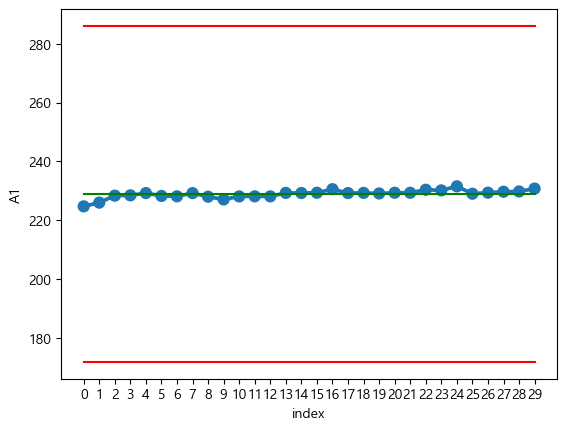

In [16]:
# seaborn 관리도 시각화
# 관리도 상/하한선 기준으로 사용한 표준편차는 400개 전체 대이터 값이고,
# 해당 데이터는 30개 만 뽑아서 사용했기 때문에 그래프 범위가 잘못설정 되어있음! 

sns.pointplot(data=df1_A1_cc, x = 'index', y='A1')

sns.lineplot(data=df1_A1_cc, x = 'index', y='Center', color='g')
sns.lineplot(data=df1_A1_cc, x = 'index', y='UCL', color='r')
sns.lineplot(data=df1_A1_cc, x = 'index', y='LCL', color='r')

In [17]:
# 30개 샘플에 해당하는 관리도 중심선 및 관리 한계선 설정 

df1_A1 = df1[['A1']].reset_index()
df1_A1_cc = df1_A1.head(30)

df1_A1_cc['Center'] = df1_A1_cc['A1'].mean()
df1_A1_cc['UCL'] = df1_A1_cc['A1'].mean() + df1_A1_cc['A1'].std() * 3
df1_A1_cc['LCL'] = df1_A1_cc['A1'].mean() - df1_A1_cc['A1'].std() * 3


C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\2424927897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_A1_cc['Center'] = df1_A1_cc['A1'].mean()
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\2424927897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_A1_cc['UCL'] = df1_A1_cc['A1'].mean() + df1_A1_cc['A1'].std() * 3
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\2424927897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<AxesSubplot:title={'center':'A1 제품 30개의 관리도'}, xlabel='index', ylabel='A1'>

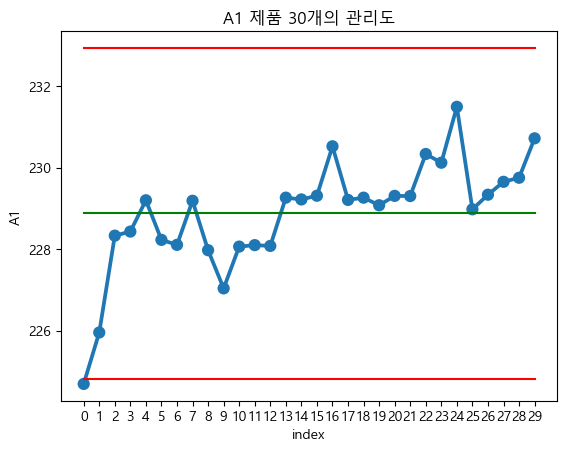

In [20]:
plt.title('A1 제품 30개의 관리도')
sns.pointplot(data=df1_A1_cc, x = 'index', y='A1')

sns.lineplot(data=df1_A1_cc, x = 'index', y='Center', color='g')
sns.lineplot(data=df1_A1_cc, x = 'index', y='UCL', color='r')
sns.lineplot(data=df1_A1_cc, x = 'index', y='LCL', color='r')

# Mission 9 | 0001jmp@gmail.com 

- df1 데이터를 이용해 아래의 문제를 해결하고자 한다. 
1. 'tag'항목의 각 값들의 빈도수를 계산 
2. 'Y1A'에서 3000이상인 값을 추출하여, 높은 순서대로 정렬한 뒤, tag별 A1값의 평균을 계산 
3. 'dt_round'값을 이용해, 연도/월/일자 를 추출하여 새로운 변수로 선언 Year/Month/Day
4. 'Day'별 'Y1A의 합을 계산 (Pivot Table 활용) 
5. 'tag'항목에서 NE282PV 항목을 추출하여, 'dt_round'를 **일별***로 A1~A6 값의 평균을 계산 
(Resample 이용해 계산, 아래와 같은 결과가 도출 되게 끔 )
![image-2.png](attachment:image-2.png)
6. 위에서 계산한 데이터 테이블에 결측값을 제거하여 df1_clean으로 선언한뒤, 
상위 30개 데이터를 뽑아, A5 값에 대한 Xbar-σ 관리도를 시각화 하시오.


In [22]:
# 1
df1['tag'].value_counts()

NE280PV    373
NE282PV     74
NE280V      13
E280PV      13
Name: tag, dtype: int64

In [28]:
# 2
cond1 = df1['Y1A'] >= 3000
df1_2 = df1[cond1].sort_values(by = 'Y1A', ascending=False)

df1_2.pivot_table(index='tag', values= 'A1',
                      aggfunc='mean')

,A1
tag,
E280PV,176.522720
NE280PV,230.525440
NE280V,228.820843
NE282PV,230.657998


In [31]:
# 3
df1['Year'] = df1['dt_round'].dt.year
df1['Month'] = df1['dt_round'].dt.month
df1['Day'] = df1['dt_round'].dt.day

df1.head(3)

,datetime_x,Unnamed: 0.1,Unnamed: 0_x,A1,A2,A3,A4,A5,A6,Unnamed: 0_y,...,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round,Year,Month,Day
0,2018-12-01 03:30:00,21.0,21.0,224.699436,227.481265,229.793475,229.740466,230.942930,229.493260,0,...,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00,2018,12,1
1,2018-12-01 07:30:00,45.0,45.0,225.961776,228.662768,231.032141,230.985556,231.878389,230.443650,1,...,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00,2018,12,1
2,2018-12-01 11:30:00,69.0,69.0,228.338453,230.019735,231.369379,230.724894,230.712800,229.034481,2,...,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00,2018,12,1


In [32]:
# 4

df1.pivot_table(index='Day', values='Y1A',
               aggfunc = 'sum')

,Y1A
Day,
1,126511.524
2,91771.302
3,289396.886
4,125731.877
5,144191.586
6,87539.926
7,77805.043
8,81396.942
9,35236.577


In [66]:
# 5 'tag'항목에서 NE282PV 항목을 추출하여,
#   'dt_round'를 일별로 A1~A6 값의 평균을 계산 

cond1 = (df1['tag'] == 'NE282PV')


#df1_process_30T = df1_process.set_index('datetime').resample('30T').mean()
df1_5 = df1[cond1].set_index('dt_round').resample('D').mean()


In [68]:
# 6
df_clean = df1_5.dropna()[['A1', 'A2','A3', 'A4','A5', 'A6']].head(4)

# 30개 샘플에 해당하는 관리도 중심선 및 관리 한계선 설정 

df_clean = df1[['A5']].reset_index()
df_clean_head = df_clean.head(30)

df_clean_head['Center'] = df_clean_head['A5'].mean()
df_clean_head['UCL'] = df_clean_head['A5'].mean() + df_clean_head['A5'].std() * 3
df_clean_head['LCL'] = df_clean_head['A5'].mean() - df_clean_head['A5'].std() * 3
df_clean_head['index']=df_clean_head.index

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\61142341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_head['Center'] = df_clean_head['A5'].mean()
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\61142341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_head['UCL'] = df_clean_head['A5'].mean() + df_clean_head['A5'].std() * 3
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_13872\61142341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

<AxesSubplot:title={'center':'A5 제품 30개의 관리도'}, xlabel='index', ylabel='A5'>

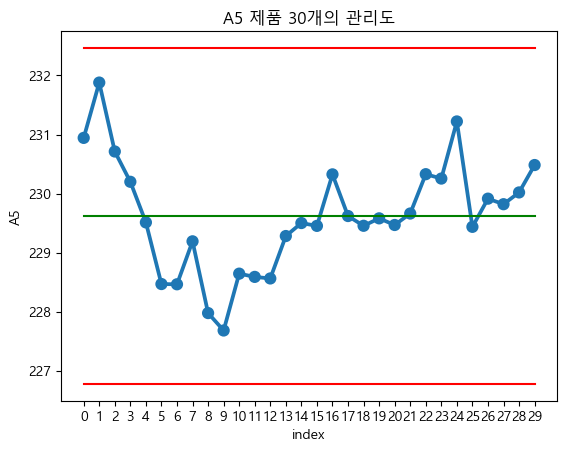

In [69]:
plt.title('A5 제품 30개의 관리도')
sns.pointplot(data=df_clean_head, x = 'index', y='A5')

sns.lineplot(data=df_clean_head, x = 'index', y='Center', color='g')
sns.lineplot(data=df_clean_head, x = 'index', y='UCL', color='r')
sns.lineplot(data=df_clean_head, x = 'index', y='LCL', color='r')